# Implement a simple MLP in TensorFlow/Keras, train on the preprocessed data, and evaluate its baseline performance (RMSE) on validation and test sets.

### Import Library 

In [13]:
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

### Data Loading & Shapes

In [22]:
X_train, y_train = joblib.load("data/processed/train.pkl")
X_val,   y_val   = joblib.load("data/processed/val.pkl")
X_test,  y_test  = joblib.load("data/processed/test.pkl")

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)

Train: (151075, 153) (151075,)
Val:   (21583, 153) (21583,)


We have 151 075 training examples, each represented by a 153-dim feature vector.

The validation and test sets are each 21 583 examples.

Targets (y_train, etc.) are one-dimensional arrays of the same length.

### Build a Simple MLP

In [11]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)   # regression output
])
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         9,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,969 (46.75 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Architecture

- **Layer 1 (Dense 64, ReLU):**  
  Starts with 64 neurons to capture a wide range of nonlinear relationships in the data. 64 
  neurons → 9 856 parameters (weights + biases)
- **Layer 2 (Dense 32, ReLU):**  
  Narrows down to 32 neurons as a bottleneck, encouraging the network to learn compact feature 
  representations. 32 neurons → 2 080 parameters
- **Output Layer (Dense 1):**  
  Single neuron with linear activation for continuous price prediction.

  All 11 969 parameters are trainable; no frozen layers.

#### Training Hyperparameters

- **Optimizer: Adam**  
  Adaptive learning rates per parameter → faster, more robust convergence on noisy gradients.  
- **Loss: MSE**  
  Mean Squared Error directly penalizes large prediction errors, standard for regression tasks.  
- **Metric: RMSE**  
  Root Mean Squared Error is on the same scale as the target (`price`), making it easier to interpret.


### Train and Evaluate

Epoch 1/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 379us/step - loss: 617733312.0000 - root_mean_squared_error: 24807.4902 - val_loss: 353401952.0000 - val_root_mean_squared_error: 18798.9883
Epoch 2/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 358us/step - loss: 340099424.0000 - root_mean_squared_error: 18383.5469 - val_loss: 272043936.0000 - val_root_mean_squared_error: 16493.7539
Epoch 3/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step - loss: 312547648.0000 - root_mean_squared_error: 17586.0586 - val_loss: 237746016.0000 - val_root_mean_squared_error: 15419.0146
Epoch 4/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 347us/step - loss: 203406464.0000 - root_mean_squared_error: 14232.7822 - val_loss: 216101824.0000 - val_root_mean_squared_error: 14700.4023
Epoch 5/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step - loss: 177790880.0000 - root_mean_squared_error: 13295.7002 - val_loss: 205377456.0000 - val_root_mean_squared_error: 14330.9961
Epoch 6/20
4722/4722 ━━━━━━━━━━━━━━━━━━━━ 2s 353us/step - loss: 187838

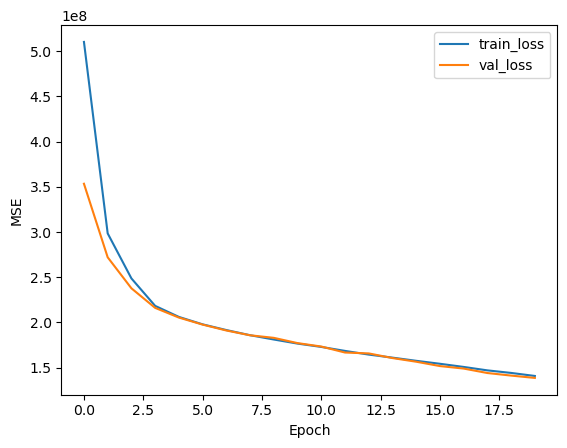

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

# Plot training curves
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

Training Schedule

- **Epochs = 20**  
  Provides enough passes over the data to converge, while limiting over‐fitting risk.  
- **Batch Size = 32**  
  Balances gradient-estimate stability (larger batches) with computational efficiency (smaller batches).

Training Curves 

Both training and validation MSE drop steeply in the first few epochs—model is quickly learning the main patterns.

After ~5 epochs the curves plateau and then slowly decline, suggesting convergence.

No sign of over-fitting (validation loss never rises above training loss).

### Test‐set Performance

In [15]:
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print("Test RMSE:", test_metrics["root_mean_squared_error"])

1349/1349 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 122573936.0000 - root_mean_squared_error: 10931.9971
Test RMSE: 10613.0634765625


On unseen test data, the model’s average error is about $10 613, down from the initial validation RMSE of ~12 684.

A modest improvement—there’s still room for hyperparameter tuning to reduce error further.

#### Validation Strategy

- **Use validation set** to monitor overfitting each epoch.  
- **Early stopping** could be added later if we see validation loss rising before 20 epochs.

In [22]:
# Save the baseline model

model.save("models/baseline-model.keras")